In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
year = 3.1536e7               #Seconds in a year
M_sun = 1.9891e30             #Mass of sun in kg
G = 6.6743e-11                #gravitational constant in m^3/kg/s^2
c = 299792458                 #speed in m/s
m1 = 0.5 * M_sun              #Mass of WD1 in kg
m2 = 0.5 * M_sun              #Mass of WD2 in kg
mu = (m1 * m2)/(m1 + m2)      #Reduced Mass of system in kg
M = m1 + m2                   #Total mass of system in kg

e0 = 0.9                      #Initial eccentricity (unitless)
nu0 = 0.01                    #Initial orbital frequency (1/seconds)

In [3]:
#Define differntial equations governing evolution
def dnudt(e0):
    dnudt = (96/(10*np.pi))*(((c**6)*mu)/((M**3)*(G**2)))*((2*np.pi*(G*M/(c**3)*nu0))**(11/3))*((1-(e0**2))**(-9/2))*((1+((73/24)*(e0**2))+((37/96)*(e0**4)))*(1-(e0**2)))
    return dnudt

def dedt(e0):
    dedt = -1*(e0/15)*(((c**3)*mu)/((M**2)*G))*((1-(e0**2))**(-7/2))*((2*np.pi*(G*M/(c**3)*nu0))**(8/3))*((304+(121*(e0**2)))*(1-(e0**2)))
    return dedt

In [4]:
dnudt0 = dnudt(e0)
dedt0 = dedt(e0)

t_M = (G * M)/(c**3)        #Characteristic length scale of M in seconds
t_char = nu0/dnudt0         #Characteristic timescale in seconds

A0 = t_M * nu0              #Reletavistic Quantity maybe (unitless)

t0 = 0                      #Start time (unitless)
tf = (5 * year)/t_char      #End time (unitless)

In [5]:
initial_conditions = np.array([A0, e0])

In [6]:
#Define coupled-odes for solve_ivp
def coupled_odes(t, y):
    A, e = y
    
    dAdt  = (96/(10*np.pi))*((t_char/t_M)*(mu/M))*((2*np.pi*A)**(11/3))*((1-(e**2))**(-9/2))*((1+((73/24)*(e**2))+((37/96)*(e**4)))*(1-(e**2)))
    
    dedt = -1*(e/15)*((t_char/t_M)*(mu/M))*((1-(e**2))**(-7/2))*((2*np.pi*A)**(8/3))*((304+(121*(e**2)))*(1-(e**2)))
    
    return [dAdt, dedt]

In [7]:
#Define time span
t_span = np.array([t0, tf])
times = np.linspace(t0,tf,1000)

In [8]:
#find solution
solution = solve_ivp(coupled_odes, t_span, initial_conditions, t_eval=times)

t = solution.t
A_sol = solution.y[0]
e_sol = solution.y[1]

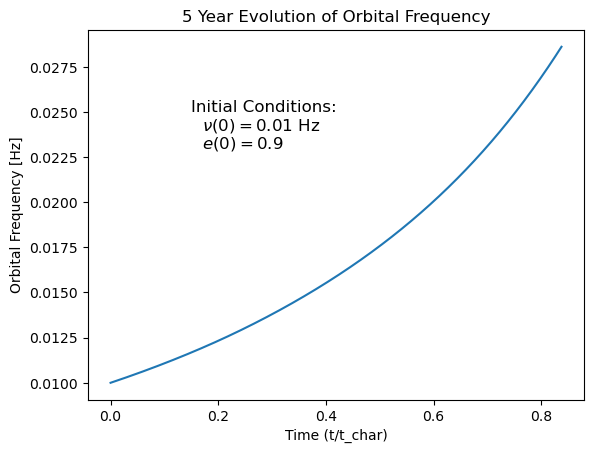

In [9]:
plt.plot(t, A_sol/t_M)
plt.title('5 Year Evolution of Orbital Frequency')
plt.xlabel('Time (t/t_char)')
plt.ylabel('Orbital Frequency [Hz]')
plt.text(0.15, 0.025, 'Initial Conditions:', fontsize = 12)
plt.text(0.17, 0.024, r'$\nu (0) = 0.01$ Hz', fontsize = 12)
plt.text(0.17, 0.023, r'$e (0) = 0.9$', fontsize = 12)
plt.show()

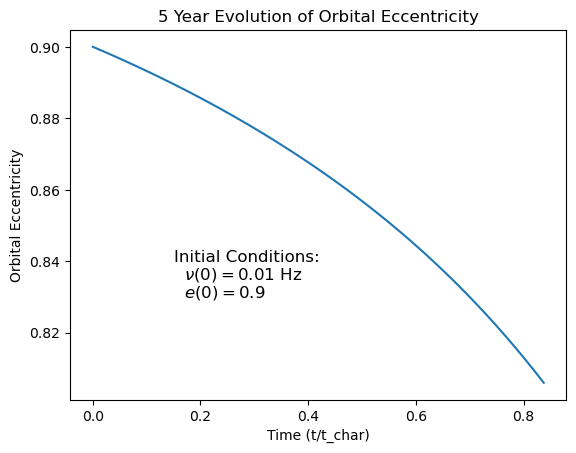

In [10]:
plt.plot(t, e_sol)
plt.title('5 Year Evolution of Orbital Eccentricity')
plt.xlabel('Time (t/t_char)')
plt.ylabel('Orbital Eccentricity')
plt.text(0.15, 0.84, 'Initial Conditions:', fontsize = 12)
plt.text(0.17, 0.835, r'$\nu (0) = 0.01$ Hz', fontsize = 12)
plt.text(0.17, 0.83, r'$e (0) = 0.9$', fontsize = 12)
plt.show()

In [12]:
def delta_nu(dnudt, delta_t):
    delta_nu = dnudt * delta_t
    return delta_nu

In [13]:
v1 = delta_nu(dnudt0, tf)

In [14]:
def delta_e(dedt, delta_t):
    delta_e = dedt * delta_t
    return delta_e

In [15]:
v2 = delta_e(dedt0, tf)

In [19]:
print(v1*t_M*t_char)   #Estimated change in nu * t_M over 5 years
print(v1*t_char)       #Estimated change in nu over 5 years
print(v2*t_char)       #Estimated change in eccentricity over 5 years

4.1267569592717434e-08
0.008375459831025736
-0.053789902899678256
